<a href="https://colab.research.google.com/github/Ahiyawesome/FLCBootcampTahmid2025/blob/main/4_DataScience_TakeHome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement

#### Using 'transaction history' and 'grocery inventory' (imported in below code snippets), answer the questions below:


In [109]:
import json
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
from IPython.display import display # Import display
from heapq import heappush, heappop

In [2]:
# Fetch the JSON 'grocery inventory' data from the URL
url = 'https://raw.githubusercontent.com/shashankbl/mlbootcamp2025flc/main/extras/grocery_inventory.json'  # Use 'raw.githubusercontent.com'
try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"Error fetching JSON from URL: {e}")
    data = {}  # Initialize as empty dictionary in case of error

# Convert the JSON data to a Pandas DataFrame
try:
    inventory_df = pd.DataFrame(data)
    display(inventory_df) # Display the DataFrame using display() for pretty print
except (ValueError, KeyError) as e:
    print(f"Error converting JSON to DataFrame: {e}")
    if data:
        print("JSON data loaded but could not be formatted as a table")

,item,category,quantity,unit_cost,max_quantity
0,tomato,vegetable,1000,0.10,10
1,apple,fruit,504,0.25,5
2,orange,fruit,400,0.05,10
3,strawberry,fruit,430,0.08,15
4,onion,vegetable,254,0.20,8
5,carrot,vegetable,204,0.05,15
6,pepper,vegetable,540,0.10,15
7,eggplant,vegetable,150,0.30,5
8,broccoli,vegetable,167,2.50,2
9,beans,vegetable,135,2.00,3


In [3]:
# Fetch the JSON 'transaction history' data from the URL
url = 'https://raw.githubusercontent.com/shashankbl/mlbootcamp2025flc/main/extras/transaction_history.json'  # Use 'raw.githubusercontent.com'
try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"Error fetching JSON from URL: {e}")
    data = {}  # Initialize as empty dictionary in case of error

# Convert the JSON data to a Pandas DataFrame
try:
    transaction_df = pd.DataFrame(data)
    display(transaction_df) # Display the DataFrame using display() for pretty print
except (ValueError, KeyError) as e:
    print(f"Error converting JSON to DataFrame: {e}")
    if data:
        print("JSON data loaded but could not be formatted as a table")

,id,customer,date,quantities,transaction_duration
0,0001,bob,"[2025, 1, 10]","{'apple': 6, 'milk': 2, 'orange': 10}",12.5
1,0002,martha,"[2025, 1, 10]","{'strawberry': 16, 'milk': 3}",2.5
2,0003,zed,"[2025, 1, 10]","{'milk': 6, 'yogurt': 4, 'mochi': 5}",4
3,0004,frank,"[2025, 1, 10]","{'onion': 10, 'carrot': 13, 'milk': 3, 'strawb...",6.5
4,0005,bob,"[2025, 1, 10]","{'onion': 20, 'carrot': 8, 'milk': 1, 'strawbe...",12.5
5,0006,suzy,"[2025, 1, 10]","{'eggplant': 6, 'apple': 2}",10.5
6,0007,mia,"[2025, 1, 11]","{'apple': 6, 'milk': 2, 'beans': 12, 'mochi': 4}",12.5
7,0008,mick,"[2025, 1, 11]","{'cheese': 8, 'mochi': 4}",4.5
8,0009,bruce,"[2025, 1, 11]","{'apple': 8, 'milk': 1, 'eggplant': 4}",3.5
9,0010,frank,"[2025, 1, 11]","{'soda': 16, 'milk': 12}",9.5


**NOTE:**
- You are allowed to format the dataframes as you prefer.
- You are encouraged to also optimize/improve the code snippets provided.
- You can import other libraries required for the analysis and visualization.
- Write conclusions/answers for each question in a 'text cell'.

### Calculate the value of prior transactions.

In [35]:
# (I don't really understand what the question is asking for specifically)

def calculate_prior_transaction_value(month, date, year, name):
  target_date = [year, month, date]
  date_match = [row == target_date for row in transaction_df['date']]   #filtering date
  customer_match = transaction_df['customer'] == name                   #filtering name
  filtered_df = transaction_df[date_match & customer_match]
  quantities = filtered_df['quantities']                                #getting the quantities

  total_cost = 0
  for item_groups in quantities:    # in case the same person bought multiple times during the same day
    for item, value in item_groups.items():
      total_cost += inventory_df.loc[inventory_df['item'] == item, 'unit_cost'].values[0] * value

  if total_cost == 0:
    print("Not found!")
  else:
    print(f"{name}'s total cost: ${total_cost}")

month = int(input("Enter month: "))
date = int(input("Enter day: "))
year = int(input("Enter year: "))
name = input("Enter name: ")


calculate_prior_transaction_value(month, date, year, name)




Enter month: 1
Enter day: 10
Enter year: 2025
Enter name: bob
bob's total cost: $18.34


<ipython-input-35-0d8c6b2a4f8e>:7: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  filtered_df = transaction_df[date_match & customer_match]


### How many transactions violated the 'max quantities' rule?

In [123]:
# Write code here...
quants = transaction_df['quantities']
amount_violated = 0

for quantity_dicts in quants:
  for item, value in quantity_dicts.items():
    if value > inventory_df.loc[inventory_df['item'] == item, 'max_quantity'].values[0]:
      amount_violated += 1
      continue

print(amount_violated)    # It seems that all of the transactions violated the max quantities rule

29


### Track the popularity of items in the grocery store by factoring the transaction quantities (histogram representation)


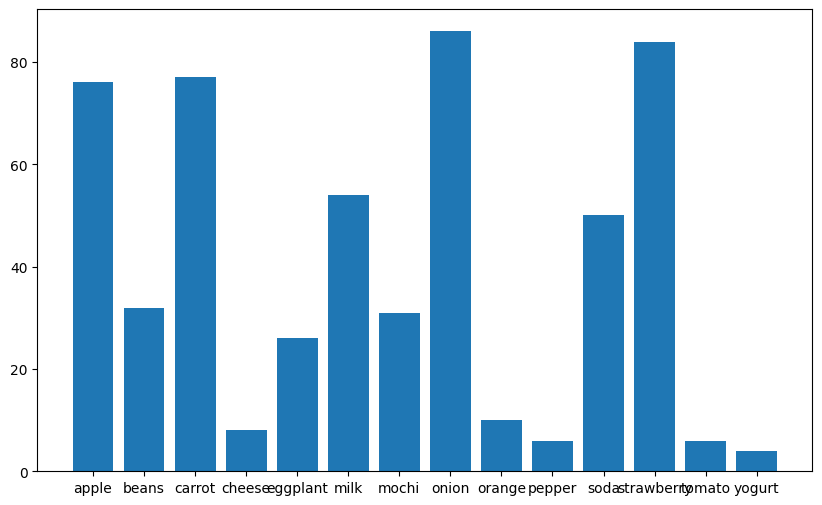

In [124]:
# Write code here...
exploded_quants = quants.apply(pd.Series).stack().reset_index(level=1, name='quantity')
exploded_quants = exploded_quants.rename(columns={'level_1': 'item'})

item_quantities = exploded_quants.groupby('item')['quantity'].sum()

plt.figure(figsize=(10, 6))
plt.bar(item_quantities.index, item_quantities.values)

plt.show()

### Average transaction per day (ignore days with no transaction as they were holidays)

In [99]:
# Write code here...
dates = transaction_df['date']
dates_s = set(tuple(date) for date in dates)


print("Average transaction per day: ", len(dates)/len(dates_s))

Average transaction per day:  4.142857142857143


### Identify the three least efficient transactions and three most efficient transactions (based on revenue/min metric)

In [122]:
# Write code here...

trans = transaction_df[['quantities','transaction_duration']]
h_min = []
h_max = []

for index, row in trans.iterrows():
  total_cost = 0
  for item, value in row['quantities'].items():
    total_cost += value * inventory_df.loc[inventory_df['item'] == item, 'unit_cost'].values[0]

  efficiency = total_cost / float(row['transaction_duration'])
  heappush(h_max, (-efficiency, index))
  heappush(h_min, (efficiency, index))

print("Three least efficient transactions:")
for _ in range(3):
  efficiency, index = heappop(h_min)
  print(f"Transaction {index}: Efficiency = {efficiency:.2f}")

print()
print("Three most efficient transactions:")
for _ in range(3):
  efficiency, index = heappop(h_max)
  print(f"Transaction {index}: Efficiency = {-efficiency:.2f}")


Three least efficient transactions:
Transaction 5: Efficiency = 0.22
Transaction 18: Efficiency = 0.37
Transaction 10: Efficiency = 0.61

Three most efficient transactions:
Transaction 2: Efficiency = 12.12
Transaction 15: Efficiency = 9.80
Transaction 9: Efficiency = 7.37


### Create a visualization of individual items sold over time

In [128]:
# Write code here...
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['date'].apply(lambda x: '-'.join(map(str, x))))

transaction_df.plot(kind='line', x='transaction_date', y='quantities', title='Individual Items Sold Over Time')
plt.show()

0    2025-01-10
1    2025-01-10
2    2025-01-10
3    2025-01-10
4    2025-01-10
5    2025-01-10
6    2025-01-11
7    2025-01-11
8    2025-01-11
9    2025-01-11
10   2025-01-11
11   2025-01-11
12   2025-01-12
13   2025-01-12
14   2025-01-12
15   2025-01-12
16   2025-01-12
17   2025-01-12
18   2025-01-12
19   2025-01-12
20   2025-01-12
21   2025-01-13
22   2025-01-13
23   2025-01-14
24   2025-01-15
25   2025-01-15
26   2025-01-18
27   2025-01-18
28   2025-01-18
Name: transaction_date, dtype: datetime64[ns]


TypeError: no numeric data to plot

### Based on the transaction history, calculate the total inventory at store opening (prior transaction quantities + current inventory quantities)

In [ ]:
# Write code here...
